In [3]:
#Mathur data for this work contained in reopsitory
#Module imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
from itertools import repeat
from scipy import stats
import csv
import os

#Choose paths
mathur_path = '/Users/jessicaschonhut/flares_paper/mathur_data/'
fig_path = '/Users/jessicaschonhut/flares_paper/'
trilegal_path = '/Users/jessicaschonhut/flares_paper/trilegal_data/'

#Pull Mathur data for temp, logg and mag
mathur_teff = pd.read_csv(mathur_path + 'mathur_sample_complete.txt', delimiter=',')['temp'] #Teff
mathur_teff = np.log10(mathur_teff) 
mathur_logg = pd.read_csv(mathur_path + 'mathur_sample_complete.txt', delimiter=',')['logg'] #Logg
mathur_mag = pd.read_csv(mathur_path + 'mathur_sample_complete.txt', delimiter=',')['kepmag'] #Mag

#CHECK
print('The number of stars in the original Mathur file is: ' + str(len(mathur_teff)))
print('The number of stars in the file of magnitudes is: ' + str(len(mathur_mag)))

The number of stars in the original Mathur file is: 197096
The number of stars in the file of magnitudes is: 197096


/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


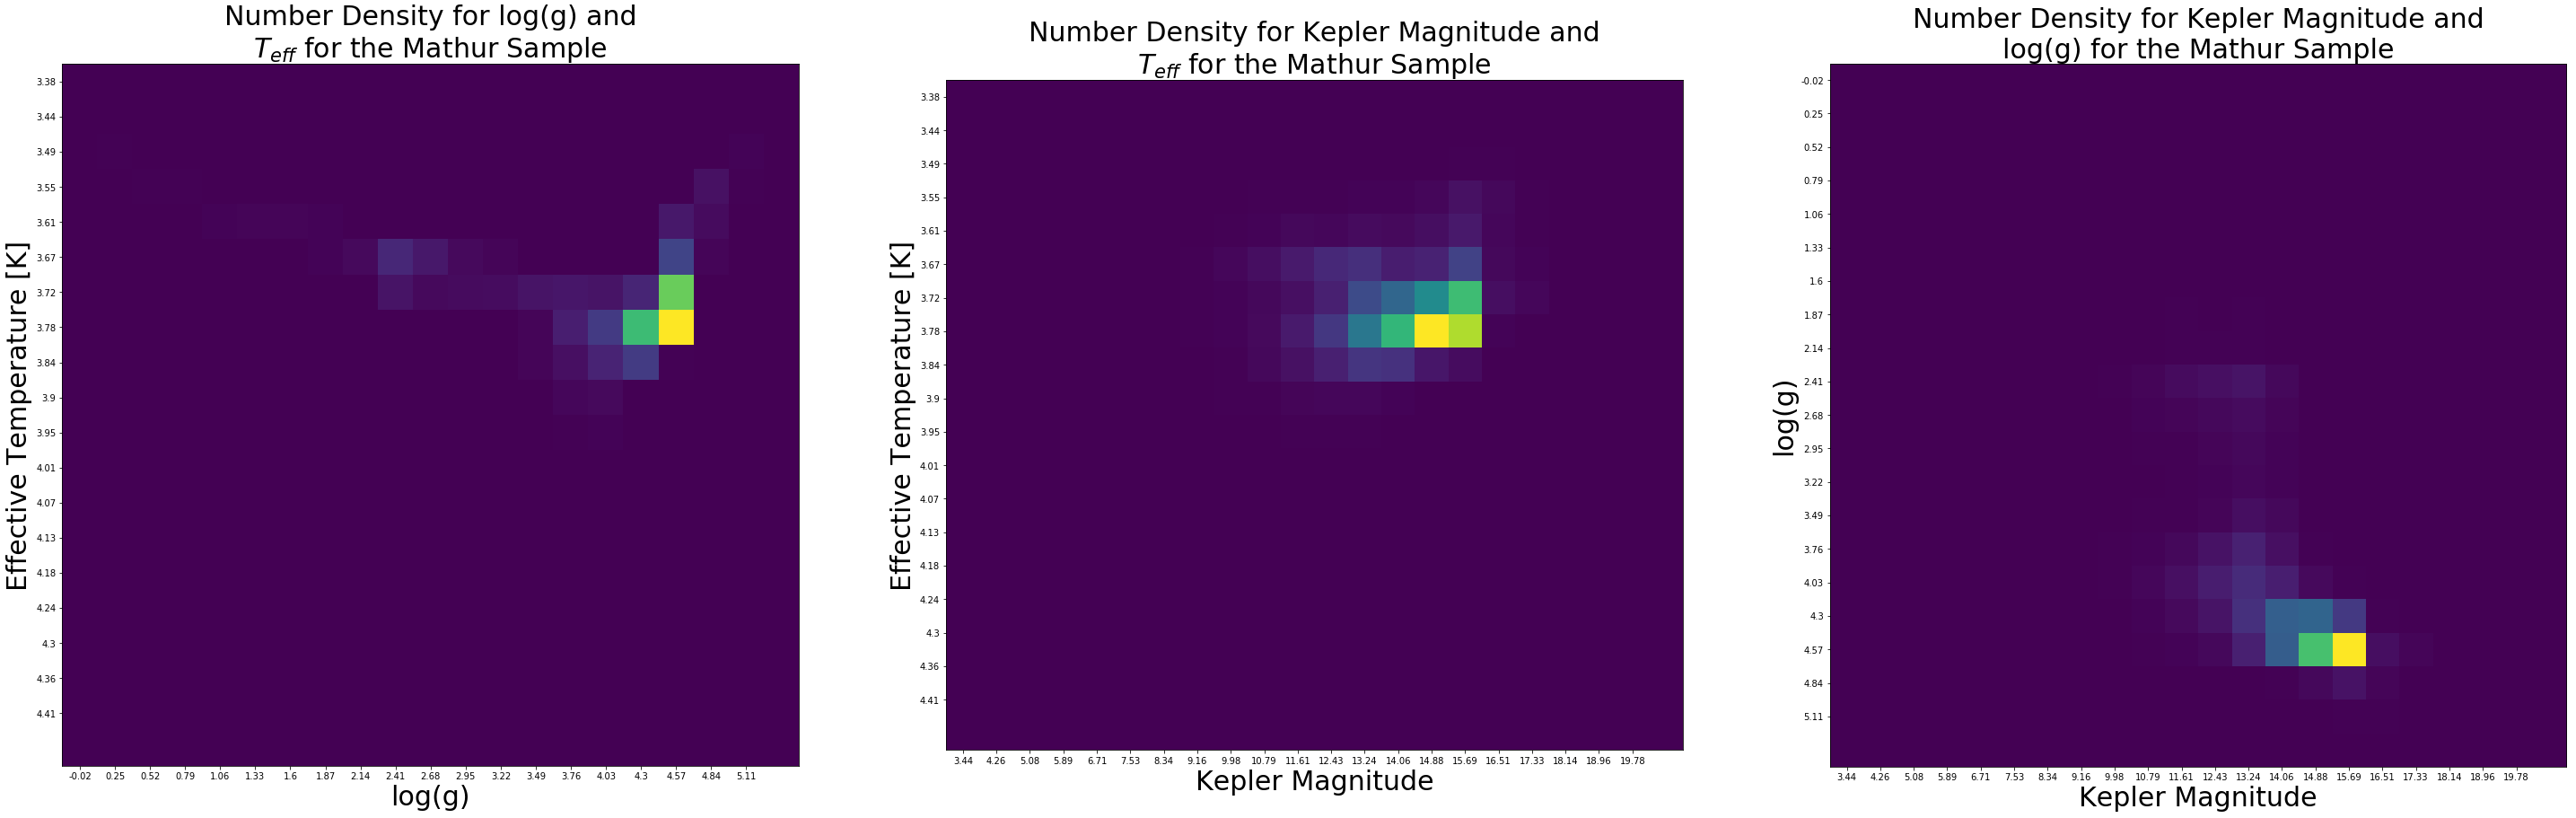

In [61]:
#Stacking them into one big sample
mathur_sample = np.vstack([mathur_teff, mathur_logg, mathur_mag])

#Bins for the three parameters 
num_bins=20 #Bins for Teff 
num_bins_logg=21 #Bins for logg
num_bins_mag=22 #Bins for mag

#Histogram for teff
#Range set is for temperature
hist_teff, bin_edges_teff = np.histogram(mathur_teff, bins=num_bins, range=(3.35, 4.5)) 
bin_centers_teff = ((bin_edges_teff[:-1] + bin_edges_teff[1:]) / 2) #Finding the centers of the bins
bin_centers_teff_ticks = [] 
#Formatting ticks for plots
for i in bin_centers_teff: 
    a = str(round(i, 2)) 
    bin_centers_teff_ticks.append(a) 

#Histogram for logg
hist_logg, bin_edges_logg = np.histogram(mathur_logg, bins=num_bins_logg, range=(min(mathur_logg), max(mathur_logg)))
bin_centers_logg = ((bin_edges_logg[:-1] + bin_edges_logg[1:]) / 2)
bin_centers_logg_ticks = []
for i in bin_centers_logg:
    a = str(round(i, 2))
    bin_centers_logg_ticks.append(a)

#Histogram for mag
hist_mag, bin_edges_mag = np.histogram(mathur_mag, bins=num_bins_mag, range=(min(mathur_mag)-2, 21))
bin_centers_mag = ((bin_edges_mag[:-1] + bin_edges_mag[1:]) / 2)
bin_centers_mag_ticks = []
for i in bin_centers_mag:
    a = str(round(i, 2))
    bin_centers_mag_ticks.append(a)

#Create an array to hold the sum in each bin at the end
N_sum_mathur = np.zeros((num_bins, num_bins_logg, num_bins_mag))

#Fill up them bins
for i in range(len(bin_edges_teff)-1): 
    for j in range(len(bin_edges_logg)-1): 
        for k in range(len(bin_edges_mag)-1): 
            boolean_array = (mathur_teff >= bin_edges_teff[i])*(mathur_teff <= bin_edges_teff[i+1])*(mathur_logg >= bin_edges_logg[j])*(mathur_logg <= bin_edges_logg[j+1])*(mathur_mag >= bin_edges_mag[k])*(mathur_mag <= bin_edges_mag[k+1])
            N_sum_mathur[i,j,k] = np.sum(boolean_array)

#Collapse the number of bins along each axis to create an array for two variables, and a third in density
N_temp_logg = np.sum(N_sum_mathur, axis=2) #temperature vs. logg
N_temp_mag = np.sum(N_sum_mathur, axis=1) #temperature vs. mag 
N_mag_logg = np.sum(N_sum_mathur, axis=0) #mag vs. logg

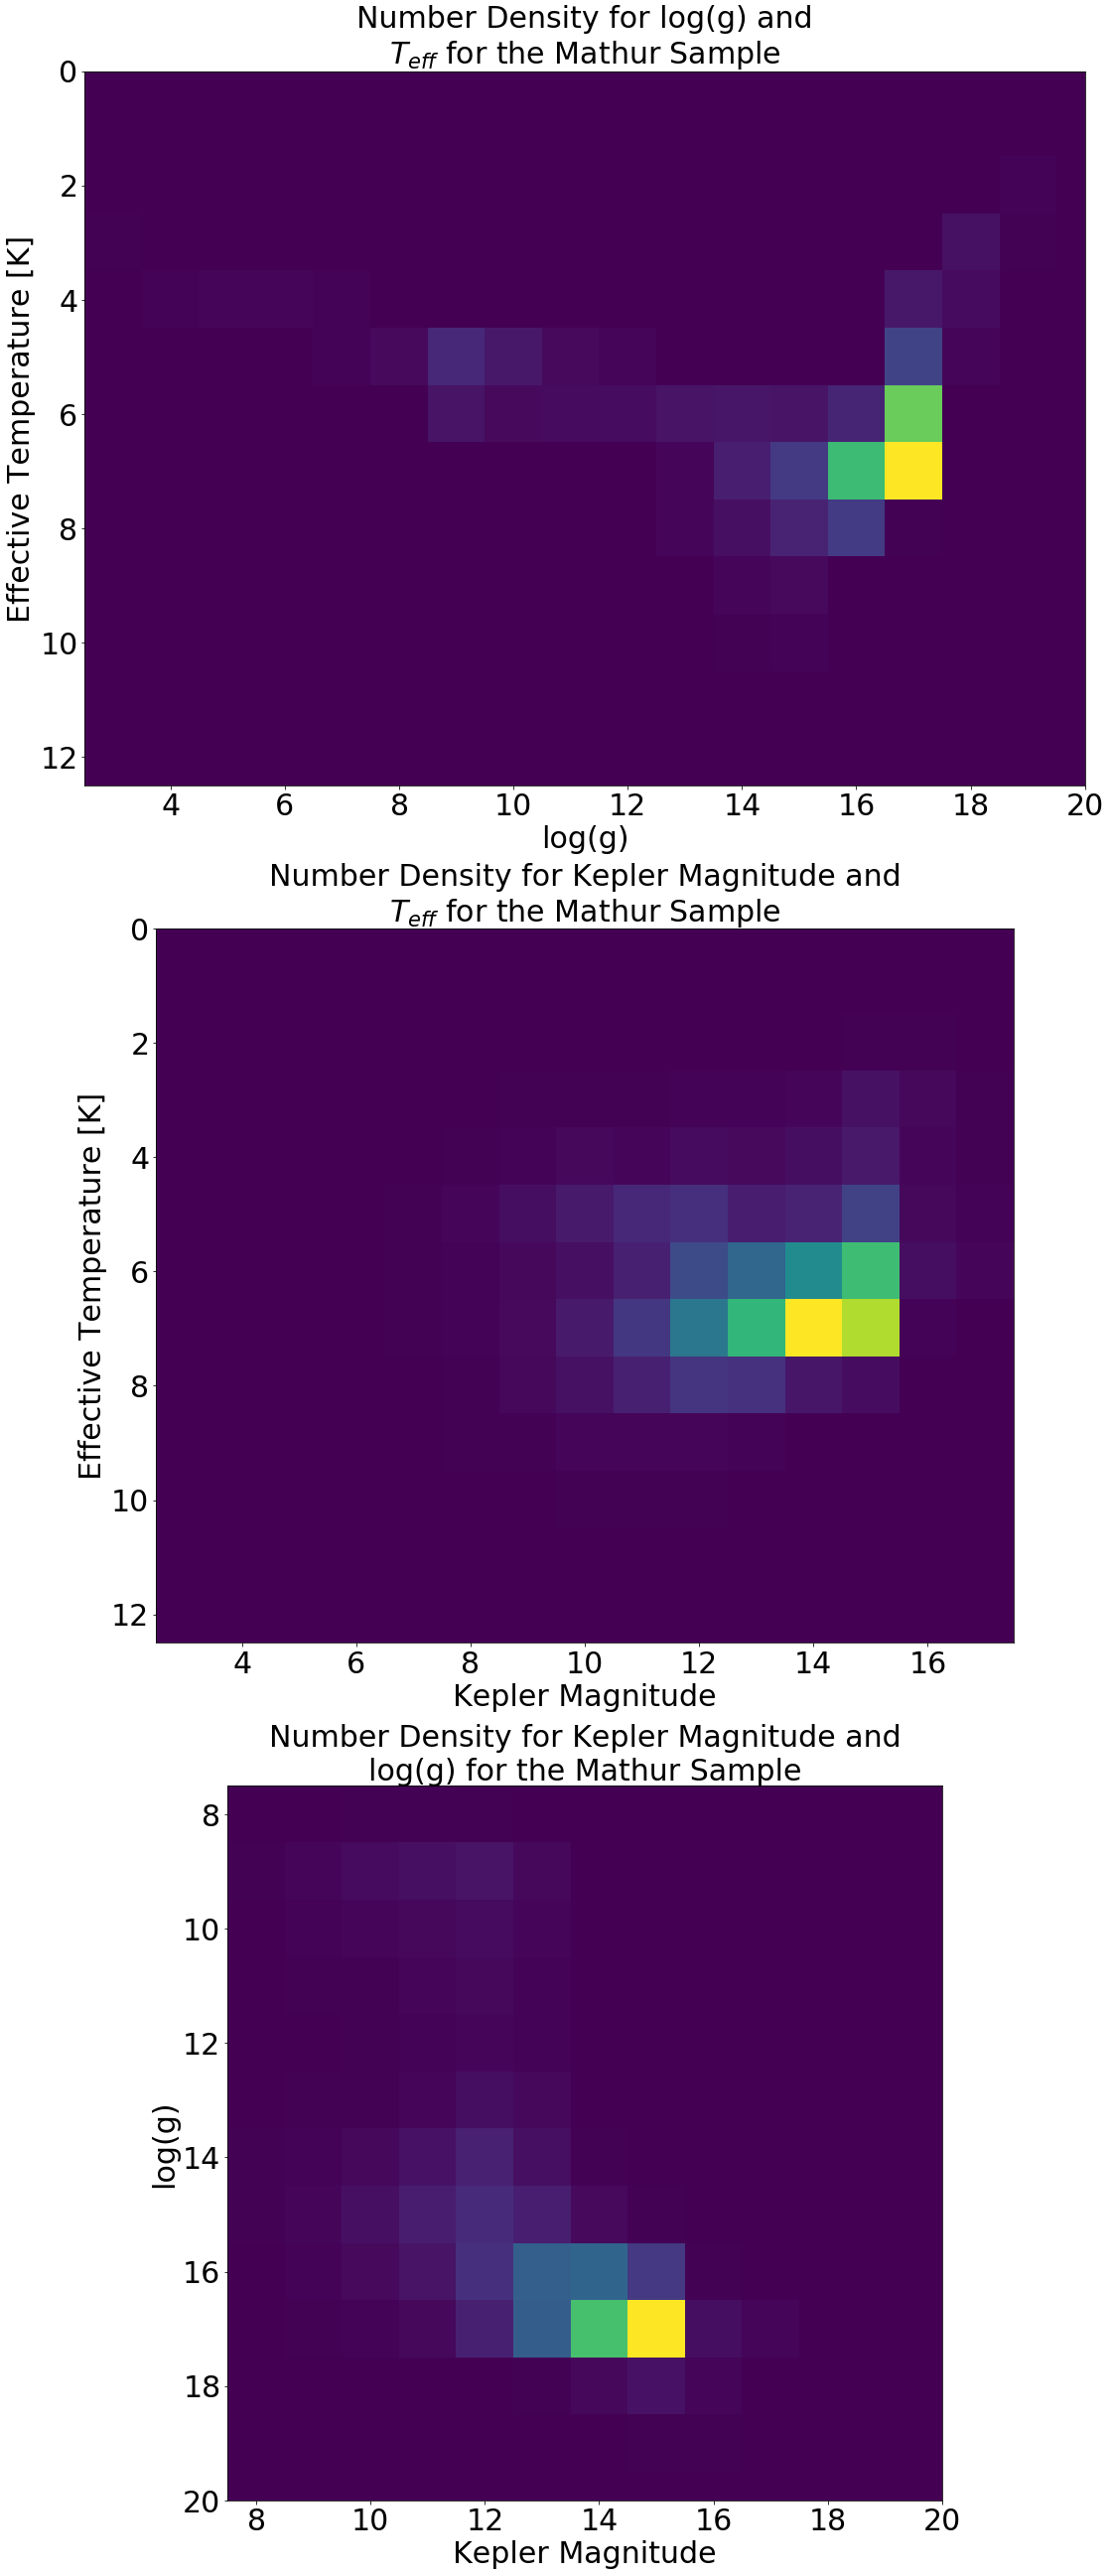

In [111]:
#Plotting 2D density plots
plt.figure(figsize=(60, 45)) 
plt.subplot(311) 
plt.imshow(N_temp_logg) 
plt.ylabel('Effective Temperature [K]', fontsize=30) 
plt.xlabel('log(g)', fontsize=30) 
plt.xticks(fontsize=30) 
plt.ylim(12.5, 0)
plt.xlim(2.5, 20)
plt.yticks(fontsize=30) 
plt.title(r'Number Density for log(g) and' +  '\n' + '$T_{eff}$ for the Mathur Sample', fontsize=30) 

plt.subplot(312) 
plt.imshow(N_temp_mag)
plt.ylabel('Effective Temperature [K]', fontsize=30)
plt.xlabel('Kepler Magnitude', fontsize=30)
plt.xticks(fontsize=30) 
plt.ylim(12.5, 0)
plt.xlim(2.5, 17.5)
plt.yticks(fontsize=30) 
plt.title(r'Number Density for Kepler Magnitude and' +  '\n' + '$T_{eff}$ for the Mathur Sample', fontsize=30) 

plt.subplot(313)
plt.imshow(N_mag_logg)
plt.xlabel('Kepler Magnitude', fontsize=30)
plt.ylabel('log(g)', fontsize=30)
plt.xticks(fontsize=30) 
plt.ylim(20, 7.5)
plt.xlim(7.5, 20)
plt.yticks(fontsize=30) 
plt.title(r'Number Density for Kepler Magnitude and' +  '\n' + 'log(g) for the Mathur Sample', fontsize=30) 

#Save and show full figure
plt.savefig(fig_path + 'ss18_mathur_binned_stars.png')

In [4]:
#Pull TRILEGAL values
print('running') #Test print for long run
trilegal_teff = pd.read_csv(trilegal_path + 'trilegal_master_sample.txt', delimiter=',')['logTe'] #Teff
trilegal_logg = pd.read_csv(trilegal_path + 'trilegal_master_sample.txt', delimiter=',')['logg'] #Logg
trilegal_mag = pd.read_csv(trilegal_path + 'trilegal_master_sample.txt', delimiter=',')['Kepler'] #Magnitude
trilegal_index = pd.read_csv(trilegal_path + 'trilegal_master_sample.txt', delimiter=',')['index'] #Index

#Converting TRILGEAL data from pd series to arrays
trilegal_teff = np.array(trilegal_teff) #Teff
trilegal_logg = np.array(trilegal_logg) #Logg
trilegal_mag = np.array(trilegal_mag) #Magnitude
trilegal_index = np.array(trilegal_index)

running


In [6]:
#This is the same process as run for the Mathur sample above.
print('running') #Test print for long run
num_bins=20
num_bins_logg=21
num_bins_mag=22

hist_teff, bin_edges_teff = np.histogram(trilegal_teff, bins=num_bins, range=(3.35, 4.5))
bin_centers_teff = ((bin_edges_teff[:-1] + bin_edges_teff[1:]) / 2)
bin_centers_teff_ticks = []
for i in bin_centers_teff:
    a = str(round(i, 1))
    bin_centers_teff_ticks.append(a)

hist_logg, bin_edges_logg = np.histogram(trilegal_logg, bins=num_bins_logg, range=(min(mathur_logg), max(mathur_logg)))
bin_centers_logg = ((bin_edges_logg[:-1] + bin_edges_logg[1:]) / 2)
bin_centers_logg_ticks = []
for i in bin_centers_logg:
    a = str(round(i, 1))
    bin_centers_logg_ticks.append(a)

hist_mag, bin_edges_mag = np.histogram(trilegal_mag, bins=num_bins_mag, range=(min(mathur_mag)-2, 21))
bin_centers_mag = ((bin_edges_mag[:-1] + bin_edges_mag[1:]) / 2)
bin_centers_mag_ticks = []
for i in bin_centers_mag:
    a = str(round(i, 1))
    bin_centers_mag_ticks.append(a)
    
N_sum = np.zeros((num_bins, num_bins_logg, num_bins_mag))
star_dict = {} #Initiate dictionary 

for i in range(len(bin_edges_teff)-1):
    for j in range(len(bin_edges_logg)-1):
        for k in range(len(bin_edges_mag)-1):
            boolean_array = (trilegal_teff >= bin_edges_teff[i])*(trilegal_teff <= bin_edges_teff[i+1])*(trilegal_logg >= bin_edges_logg[j])*(trilegal_logg <= bin_edges_logg[j+1])*(trilegal_mag >= bin_edges_mag[k])*(trilegal_mag <= bin_edges_mag[k+1])
            N_sum[i,j,k] = np.sum(boolean_array)
            star_dict[(i,j,k)] = boolean_array 

N_temp_logg = np.sum(N_sum, axis=2)
N_temp_mag = np.sum(N_sum, axis=1)
N_logg_mag = np.sum(N_sum, axis=0)

running


9.716


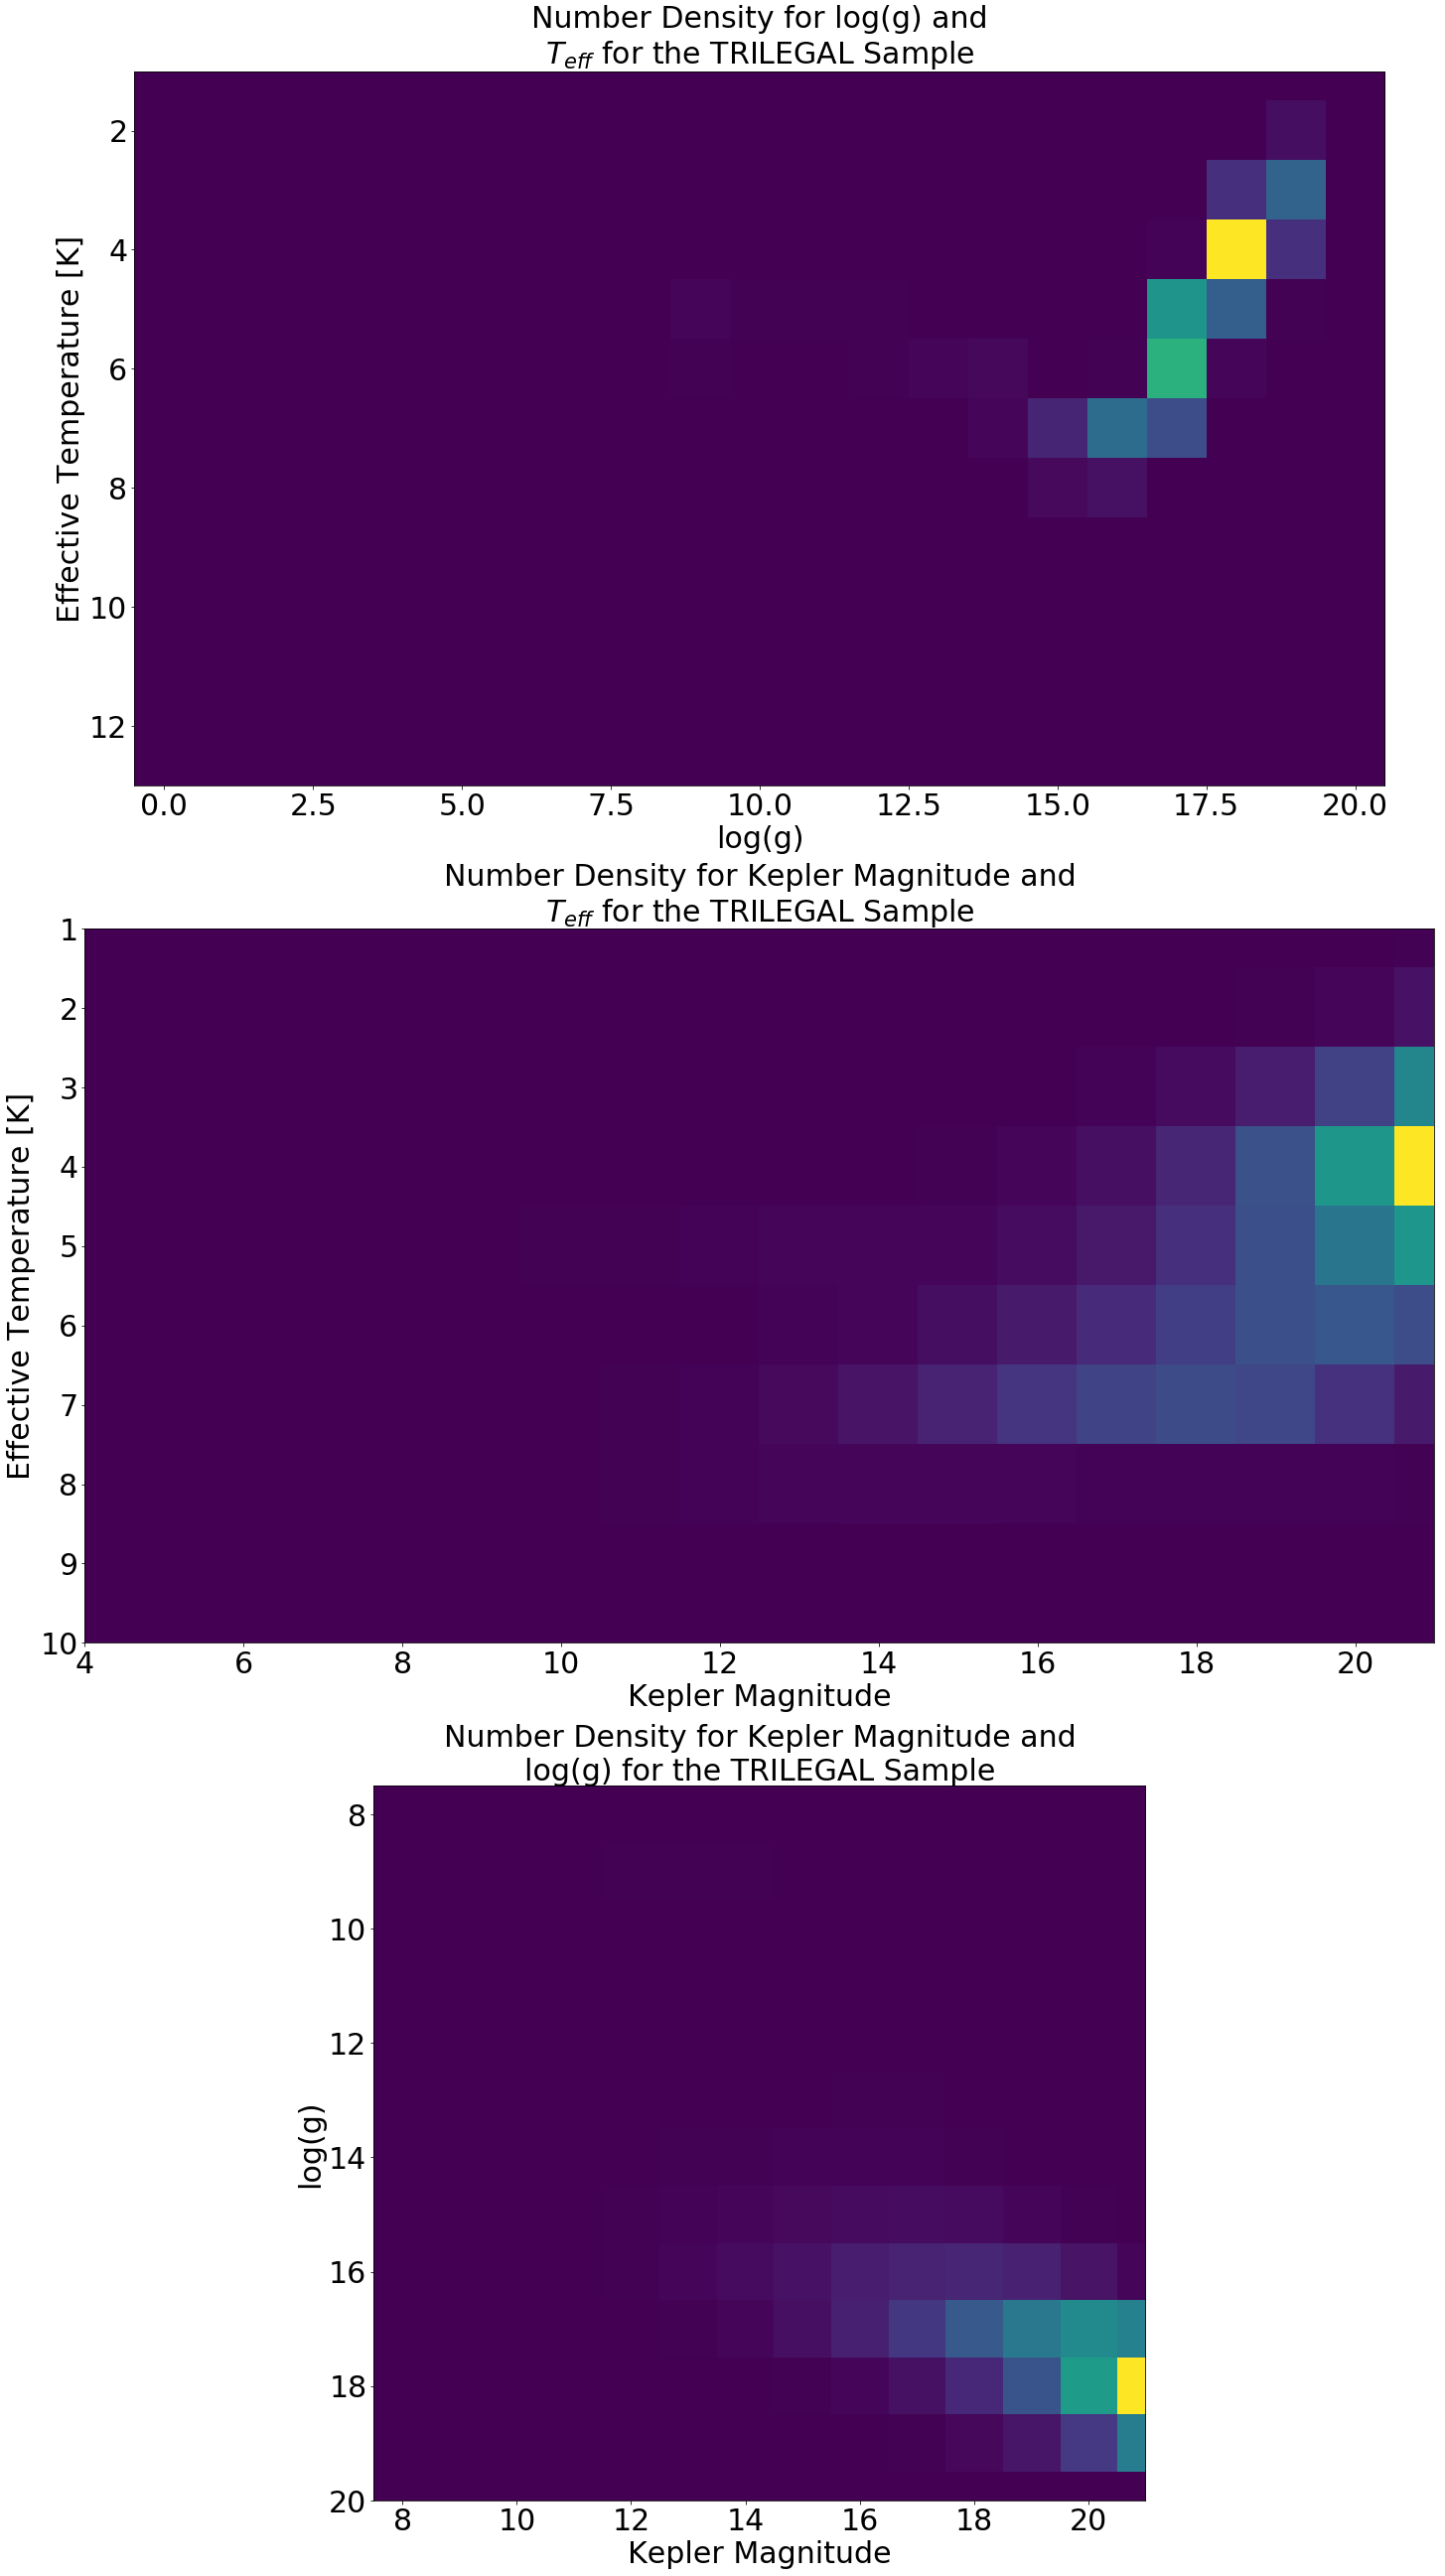

In [9]:
print(max(trilegal_logg))
plt.figure(figsize=(60, 45))
plt.subplot(311)
plt.imshow(N_temp_logg)
plt.ylabel('Effective Temperature [K]', fontsize=30)
plt.xlabel('log(g)', fontsize=30)
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30) 
plt.ylim(13, 1)
plt.title(r'Number Density for log(g) and' +  '\n' + '$T_{eff}$ for the TRILEGAL Sample', fontsize=30) 

plt.subplot(312)
plt.imshow(N_temp_mag)
plt.ylabel('Effective Temperature [K]', fontsize=30)
plt.xlabel('Kepler Magnitude', fontsize=30)
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30)
plt.xlim(4,21)
plt.ylim(10, 1)
plt.title(r'Number Density for Kepler Magnitude and' +  '\n' + '$T_{eff}$ for the TRILEGAL Sample', fontsize=30) 

plt.subplot(313)
plt.imshow(N_logg_mag)
plt.xlabel('Kepler Magnitude', fontsize=30)
plt.ylabel('log(g)', fontsize=30)
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30)
plt.ylim(20, 7.5)
plt.xlim(7.5, 21)
plt.title(r'Number Density for Kepler Magnitude and' +  '\n' + 'log(g) for the TRILEGAL Sample', fontsize=30) 

plt.savefig(fig_path + 'ss18_trilegal_binned_stars.png')

running file creation
Number of bins in the final sample: 737
[14707, 4016775, 4828252, 4016775, 4828252, 1761831, 486409, 2236151, 481945, 131732]


/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


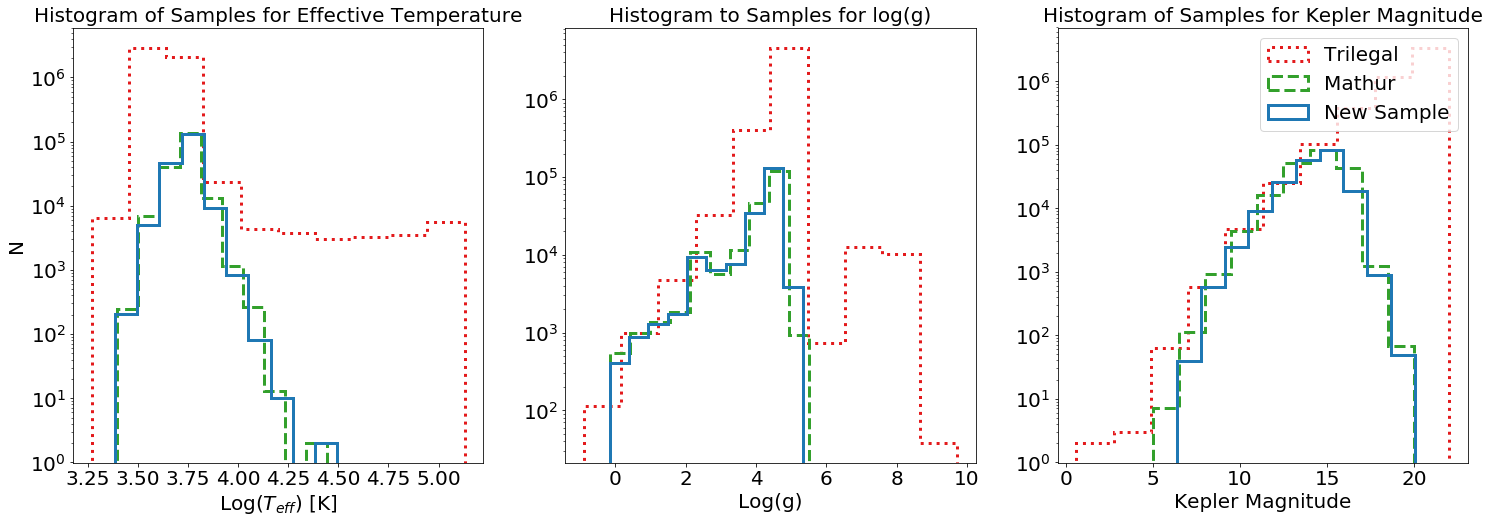

In [21]:
print('running file creation') #Test print for long run 

#Initiating list for values for new sample
trilegal_index_new = []

#Count stars in bins and assign indices to them
for i in range(N_sum_mathur.shape[0]): 
    for j in range(N_sum_mathur.shape[1]): 
        for k in range(N_sum_mathur.shape[2]): 
            if N_sum_mathur[i,j,k] < 1:
                pass
            elif N_sum[i,j,k] < 1: 
                pass 
            else: 
                new_star = star_dict[(i,j,k)] 
                a = np.random.uniform(0, 1, int(N_sum_mathur[i,j,k])) 
                arg_in = np.argsort(a) 

                if N_sum[i,j,k] >= N_sum_mathur[i,j,k]:
                    trilegal_index_new.append(trilegal_index[new_star][arg_in[:int(N_sum_mathur[i,j,k]+1)]])
                    
                if N_sum[i,j,k] < N_sum_mathur[i,j,k]: 
                    
                    trilegal_index2, trilegal_index3, trilegal_index4 = [], [], []
                    trilegal_index2.append([trilegal_index[new_star]] * np.sum(int(N_sum_mathur[i,j,k])))
                    for sublist in trilegal_index2:
                         for item in sublist:
                            trilegal_index3.append(item)
                    for sublist in trilegal_index3:
                         for item in sublist:
                            trilegal_index4.append(item)
                    trilegal_index4 = np.array(trilegal_index4)
                      
                    trilegal_index_new.append(trilegal_index4[:int(N_sum_mathur[i,j,k]+1)]) 
                
#Print how many numbers of bins will be in the final sample
print("Number of bins in the final sample: " + str(len(trilegal_index_new)))

list_trilegal_index = []
for sublist in trilegal_index_new:
    for item in sublist: 
        list_trilegal_index.append(item)
print(list_trilegal_index[0:10])

#Collect data for the new file from TRILEGAL, using the new index list
df = pd.read_csv(trilegal_path +'trilegal_master_sample.txt')
with open(fig_path + 'final_sample_initial.csv', 'a', newline='') as f_outputcsv: 
    csv_writer = csv.writer(f_outputcsv) 
    row_head = ['index','Gc','logAge','[M/H]','m_ini','logL','logTe','logg','m-M0','Av','m2/m1','mbol','Kepler','g','r','i','z','DDO51_finf','J','H','Ks','Mact']
    csv_writer.writerow(row_head)
    for i in list_trilegal_index:  
        row = df.iloc[int(i)] 
        csv_writer.writerow(row) 
        
df = pd.read_csv(fig_path + 'final_sample_initial.csv')
df.to_csv(fig_path + 'final_sample.csv', index = False)    
os.remove(fig_path + 'final_sample_initial.csv')

list_trilegal_temps = pd.read_csv(fig_path + 'final_sample.csv')['logTe'] 
list_trilegal_logg = pd.read_csv(fig_path + 'final_sample.csv')['logg']
list_trilegal_mags = pd.read_csv(fig_path + 'final_sample.csv')['Kepler']

#Overplotting original TRILEGAL sample, Mathur sample and new sample to make sure they agree
plt.figure(figsize=(25, 8)) #Set up figure 

#Histogram for effective temperature 
plt.subplot(131) #First subplot 
plt.hist(trilegal_teff, histtype='step', linestyle=':', color='#e31a1c', linewidth=3) #Plot original TRILEGAL teff
plt.hist(mathur_teff, histtype='step', linestyle='--', color='#33a02c', linewidth=3) #Plot Mathur teff
plt.hist(list_trilegal_temps, histtype='step', linestyle='-', color='#1f78b4', linewidth=3) #Plot new teff
plt.yscale('log') #Set log scale on y axis as number of stars in TRILEGAL sample much greater than Mathur sample
plt.xlabel(r'Log($T_{eff}$) [K]', fontsize=20) #Set x label 
plt.ylabel('N', fontsize=20) #Set y label
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Histogram of Samples for Effective Temperature', fontsize=20) #Set title

#Histogram from logg - see above 
plt.subplot(132)
plt.hist(trilegal_logg, histtype='step', linestyle=':', color='#e31a1c', linewidth=3)
plt.hist(mathur_logg, histtype='step', linestyle='--', color='#33a02c', linewidth=3)
plt.hist(list_trilegal_logg, histtype='step', linestyle='-', color='#1f78b4', linewidth=3)
plt.yscale('log')
plt.xlabel('Log(g)', fontsize=20)
#plt.ylabel('N', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Histogram to Samples for log(g)', fontsize=20)

#Histogram for Kepler magnitude - see above 
plt.subplot(133)
plt.hist(trilegal_mag, histtype='step', label='Trilegal', linestyle=':', color='#e31a1c', linewidth=3) #Set sample label 
#Set sample label below for Mathur
plt.hist(mathur_mag, range=(min(mathur_mag), max(mathur_mag)), histtype='step', label='Mathur', linestyle='--', color='#33a02c', linewidth=3) 
plt.hist(list_trilegal_mags, histtype='step', label='New Sample', linestyle='-', color='#1f78b4', linewidth=3) #Set sample label 
plt.yscale('log')
plt.xlabel('Kepler Magnitude', fontsize=20)
#plt.ylabel('N', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Histogram of Samples for Kepler Magnitude', fontsize=20)
plt.legend(fontsize=20) #Plot legend

#Save and show figure 
plt.savefig(fig_path + 'final_sample_comparison.png')